# TRATAMENTO DOS DADOS

In [ ]:
### import pandas as pd
import os
import glob
import csv
import datetime


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# pd.set_option('display.max_rows', None)


path = 'C:\\Users\\luizjr\\REPOS\\ADA_TECH\\FORMACAO\\MODULO_05\\csv_tuberculose\\'


df = pd.read_csv(path+'TUBEBR22.csv', delimiter=';', encoding='latin1')


estados = ['11RO','12AC','13AM','14RR','15PA','16AP','17TO','21MA','22PI','23CE','24RN','25PB','26PE','27AL','28SE','29BA',
           '31MG','32ES','33RJ','35SP','41PR','42SC','43RS','50MS','51MT','52GO','53DF']


def traduzir_estado(codigo_estado):
    codigo_str = str(codigo_estado)
    for estado in estados:
        if estado.startswith(codigo_str):
            return estado[2:]
    else:
        return "Outro"

    
    
df = pd.DataFrame(df)
# df = df.dropna(how='all')
df = df.dropna(subset=['CS_ESCOL_N'])
df = df.dropna(subset=['CS_RACA'])
df = df.dropna(subset=['POP_LIBER'])
df = df.dropna(subset=['POP_RUA'])
df = df.dropna(subset=['POP_IMIG'])
df = df.dropna(subset=['CS_GESTANT'])
df = df.dropna(subset=['ANO_NASC'])


df['CS_ESCOL_N'] = df['CS_ESCOL_N'].astype(int)
df['CS_RACA'] = df['CS_RACA'].astype(int)
df['ANO_NASC'] = df['ANO_NASC'].astype(int)

df['ESTADO'] = df['SG_UF_NOT'].apply(traduzir_estado)


df['ESCOLARIDADE'] = df['CS_ESCOL_N'].apply(lambda x: 'Ign/Branc' if x == 9
                                              else ('Analfabeto' if x == 0
                                              else ('1ª a 4ª série incompleta do EF' if x == 1
                                              else ('4ª série completa do EF' if x == 2
                                              else ('5ª a 8ª série incompleta do EF' if x == 3
                                              else ('Ensino fundamental completo' if x == 4
                                              else ('Ensino médio incompleto' if x == 5
                                              else ('Ensino médio completo' if x == 6
                                              else ('Educação superior incompleta' if x == 7
                                              else ('Educação superior completa' if x == 8
                                              else ('Não se aplica' if x == 10
                                              else 'Outro')))))))))))



df['CS_RACA'] = df['CS_RACA'].apply(lambda x: 'Ign/Branc' if x == 0
                                    else ('Ign/Branc' if x == 9
                                    else ('Branca' if x == 1
                                    else ('Preta' if x == 2
                                    else ('Amarela' if x == 3
                                    else ('Parda' if x == 4
                                    else ('Indigena' if x == 5
                                    else 'Outro')))))))


df['POP_LIBER'] = df['POP_LIBER'].apply(lambda x: 'Liberdade' if x == 2
                                        else ('Restrição de Liberdade' if x == 1
                                        else "Outro"))


df['POP_RUA'] = df['POP_RUA'].apply(lambda x: 'Situação de Rua' if x == 1
                                        else ('Com residência' if x == 2
                                        else "Outro"))


df['POP_IMIG'] = df['POP_IMIG'].apply(lambda x: 'Estrangeiro' if x == 1
                                        else ('Brasileiro' if x == 2
                                        else "Outro"))


df['CS_GESTANT'] = df['CS_GESTANT'].apply(lambda x: 'Ign/Branc' if x == 0
                                    else ('Ign/Branc' if x == 9
                                    else ('1º Trimestre' if x == 1
                                    else ('2º Trimestre' if x == 2
                                    else ('3º Trimestre' if x == 3
                                    else ('Idade Gestacional Ignorada' if x == 4
                                    else ('Não' if x == 5
                                    else ('Não se Aplica' if x == 6
                                    else 'Outro'))))))))


df['TRATAMENTO'] = df['TRATAMENTO'].apply(lambda x: 'Caso Novo' if x == 1
                                    else ('Recidiva' if x == 2
                                    else ('Reingresso após Abandono' if x == 3
                                    else ('Não Sabe' if x == 4
                                    else ('Transferência' if x == 5
                                    else ('Pós-óbito' if x == 6                                    
                                    else 'Outro'))))))


df['IDADE'] = 2022 - df['ANO_NASC']

df['DT_DIAG'] = pd.to_datetime(df['DT_DIAG'])

df['MES_DIAG'] = df['DT_DIAG'].dt.month

df[['DT_DIAG', 'MES_DIAG', 'IDADE', 'CS_SEXO', 'TRATAMENTO', 'POP_LIBER', 'POP_RUA', 'POP_IMIG', 'CS_GESTANT', 'CS_RACA', 'ESTADO', 'ESCOLARIDADE']]


#print(df)

# print(df['escolaridade'].dtypes)

## Criando arquivo CSV com colunas selecionadas

In [93]:
TUBER_CSV = df[['DT_DIAG', 'MES_DIAG', 'IDADE', 'CS_SEXO', 'TRATAMENTO', 'POP_LIBER', 'POP_RUA', 'POP_IMIG', 'CS_GESTANT', 'CS_RACA', 'ESTADO', 'ESCOLARIDADE']]
TUBER_CSV.to_csv(path+'TUBER_CSV.csv', index=False)

## Lendo novo arquivo CSV e atribuindo a um DataFrame

In [94]:
df_tuberculose = pd.read_csv(path+'TUBER_CSV.csv', delimiter=',', encoding='utf-8')
df_tuberculose

,DT_DIAG,MES_DIAG,IDADE,CS_SEXO,TRATAMENTO,POP_LIBER,POP_RUA,POP_IMIG,CS_GESTANT,CS_RACA,ESTADO,ESCOLARIDADE
0,2022-01-01,1,31,M,Transferência,Liberdade,Com residência,Brasileiro,Não se Aplica,Parda,ES,Ign/Branc
1,2022-01-04,1,56,M,Reingresso após Abandono,Liberdade,Com residência,Brasileiro,Não se Aplica,Preta,ES,4ª série completa do EF
2,2022-01-01,1,51,M,Caso Novo,Liberdade,Com residência,Brasileiro,Não se Aplica,Ign/Branc,ES,Ign/Branc
3,2022-01-06,1,26,M,Caso Novo,Restrição de Liberdade,Com residência,Brasileiro,Não se Aplica,Parda,ES,5ª a 8ª série incompleta do EF
4,2022-01-03,1,30,M,Reingresso após Abandono,Liberdade,Com residência,Brasileiro,Não se Aplica,Parda,ES,Ensino fundamental completo
...,...,...,...,...,...,...,...,...,...,...,...,...
78204,2022-12-31,12,14,F,Caso Novo,Liberdade,Com residência,Brasileiro,Não,Parda,PA,5ª a 8ª série incompleta do EF
78205,2022-12-31,12,26,M,Caso Novo,Liberdade,Com residência,Brasileiro,Não se Aplica,Branca,RS,Ign/Branc
78206,2022-12-31,12,59,M,Caso Novo,Liberdade,Com residência,Brasileiro,Não se Aplica,Preta,CE,Analfabeto
78207,2022-12-31,12,44,F,Caso Novo,Liberdade,Com residência,Brasileiro,Não,Parda,RN,1ª a 4ª série incompleta do EF


# CASOS DE TUBERCULOSE DIVIDIDOS POR HOMENS E MULHERES 

In [263]:
# testo = df_tuberculose.groupby(['CS_SEXO', 'ESTADO']).size().reset_index(name='count')
testo = df_tuberculose.groupby(['ESTADO']).size().reset_index(name='total_de_casos')
# testo

In [266]:
##Análise de casos de tuberculose divido por sexo 
pop_total = df_tuberculose.groupby(['CS_SEXO', 'ESTADO']).size().reset_index(name='count')
casos_geral = df_tuberculose.groupby(['ESTADO']).size().reset_index(name='total_de_casos')

pop_fem = pop_total[pop_total['CS_SEXO'] == 'F']
pop_masc = pop_total[pop_total['CS_SEXO'] == 'M']

dados = pd.merge(pop_fem, pop_masc, on='ESTADO', suffixes=('_fem', '_masc'))
dados = pd.merge(dados, casos_geral, on='ESTADO')

dados['%fem'] = (dados['count_fem'] / dados['total_de_casos']) * 100
dados['%masc'] = (dados['count_masc'] / dados['total_de_casos']) * 100

dados['%fem'] = dados['%fem'].astype(int)
dados['%masc'] = dados['%masc'].astype(int)

dados_final = dados[['ESTADO', '%fem', '%masc']]
print(dados_final)

   ESTADO  %fem  %masc
0      AC    30     70
1      AL    33     66
2      AM    37     62
3      AP    27     72
4      BA    33     65
5      CE    33     66
6      DF    29     70
7      ES    25     74
8      GO    27     72
9      MA    30     69
10     MG    26     73
11     MS    20     79
12     MT    31     68
13     PA    32     67
14     PB    29     70
15     PE    29     70
16     PI    31     68
17     PR    28     71
18     RJ    29     70
19     RN    24     75
20     RO    25     74
21     RR    20     79
22     RS    31     68
23     SC    32     67
24     SE    24     75
25     SP    98      1
26     TO    31     68


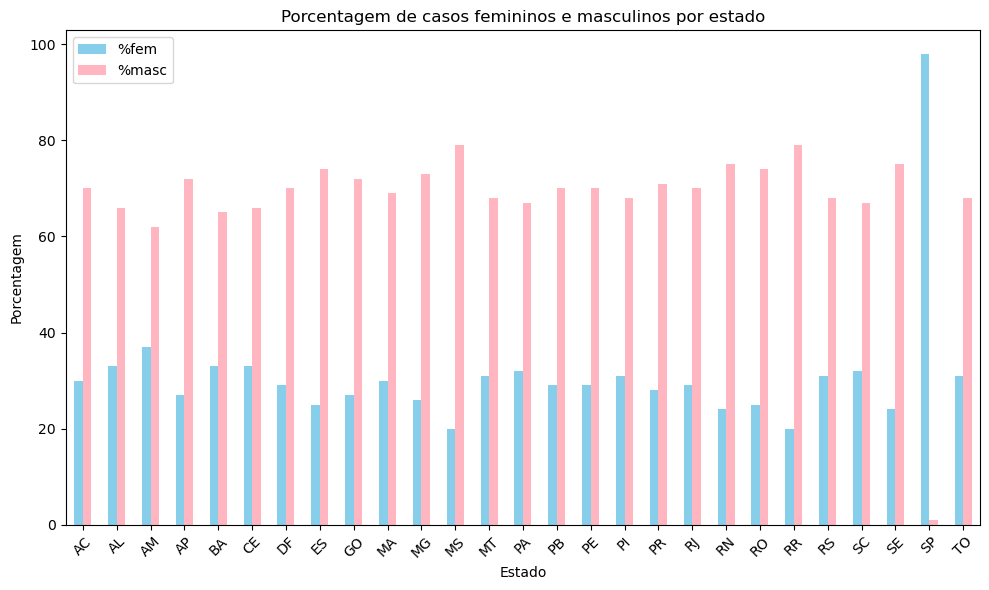

In [265]:
import matplotlib.pyplot as plt
cores = ['#87CEEB', '#FFB6C1']
fig, ax = plt.subplots(figsize=(10, 6))
dados_final.set_index('ESTADO').plot(kind='bar', ax=ax, color=cores)

plt.title('Porcentagem de casos femininos e masculinos por estado')
plt.xlabel('Estado')
plt.ylabel('Porcentagem')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# CASOS DE TUBERCULOSE POR ESTRANGEIROS

In [100]:
pop_imi = df_tuberculose.groupby(['POP_IMIG', 'ESTADO']).size()
pop_imi = pd.DataFrame(pop_imi)
pop_imi

0
POP_IMIG   ESTADO      
Brasileiro AC       564
           AL       996
           AM      4012
           AP       405
           BA      4394
...                 ...
Outro      RS        90
           SC        17
           SE         2
           SP        46
           TO         2

[80 rows x 1 columns]

In [267]:
#Estrangeiros com tuberculose dentro do total
pop_imi = df_tuberculose.groupby(['POP_IMIG', 'ESTADO']).size().reset_index(name='count')
pop_imi = pd.DataFrame(pop_imi)
pop_imi = pop_imi.loc[pop_imi['POP_IMIG'] == 'Estrangeiro']
# pop_rua

casos_geral = df_tuberculose.groupby(['ESTADO']).size().reset_index(name='contagem')
# casos_geral
dados = pd.merge(pop_imi, casos_geral, left_on='ESTADO', right_on='ESTADO', how='left')

dados['%'] = (dados['count'] / dados['contagem'])*100
dados['%'] = dados['%'].map("{:.2f}".format)
dados['%'] = dados['%'].astype(float)
# type(dados['%'][0])
dados

,POP_IMIG,ESTADO,count,contagem,%
0,Estrangeiro,AC,5,570,0.88
1,Estrangeiro,AL,6,1023,0.59
2,Estrangeiro,AM,40,4070,0.98
3,Estrangeiro,AP,3,418,0.72
4,Estrangeiro,BA,6,4636,0.13
5,Estrangeiro,CE,9,4117,0.22
6,Estrangeiro,DF,6,410,1.46
7,Estrangeiro,ES,8,1986,0.40
8,Estrangeiro,GO,18,1199,1.50
9,Estrangeiro,MA,8,2769,0.29


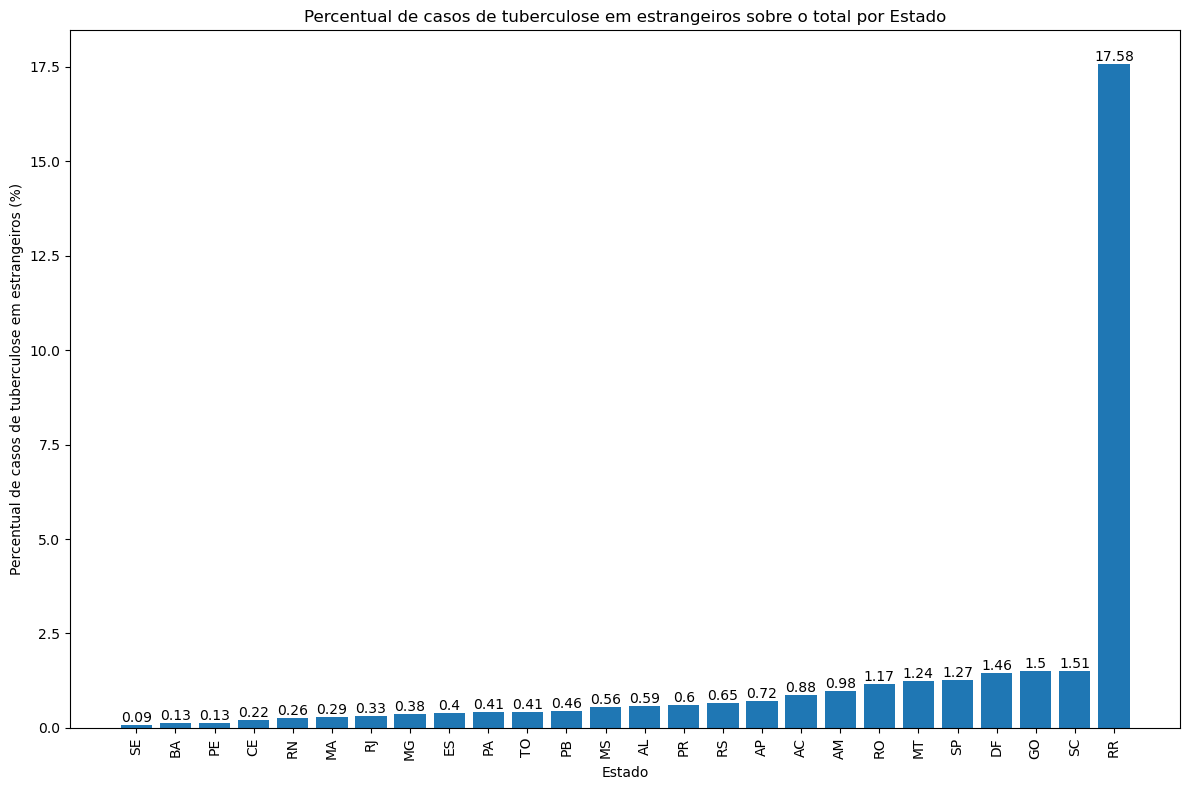

In [268]:
import matplotlib.pyplot as plt

dados_sorted = dados.sort_values(by='%')

plt.figure(figsize=(12, 8))
plt.bar(dados_sorted['ESTADO'], dados_sorted['%'])

for index, row in dados_sorted.iterrows():
    plt.text(row['ESTADO'], row['%'], str(row['%']), ha='center', va='bottom')

plt.xlabel('Estado')
plt.ylabel('Percentual de casos de tuberculose em estrangeiros (%)')
plt.title('Percentual de casos de tuberculose em estrangeiros sobre o total por Estado')

plt.xticks(rotation=90)  

# plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter())

plt.tight_layout()  

plt.show()

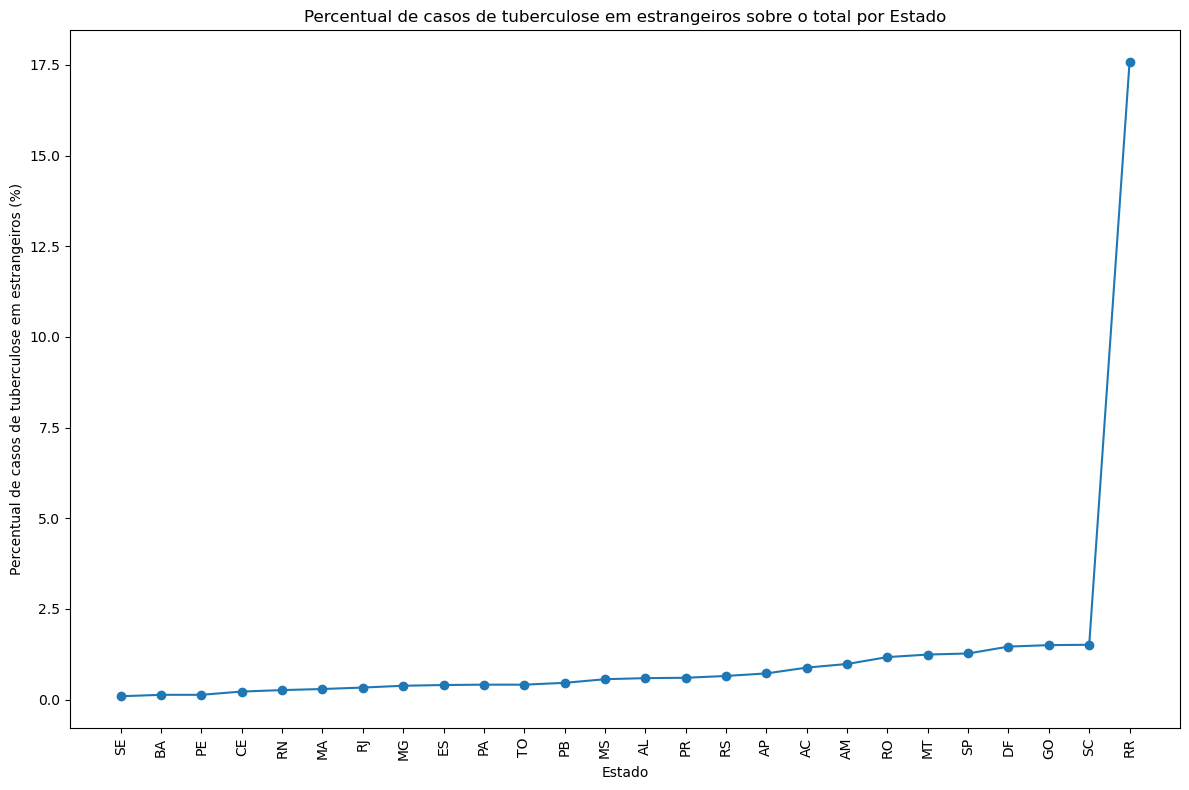

In [269]:
dados_sorted = dados.sort_values(by='%')

plt.figure(figsize=(12, 8))
plt.plot(dados_sorted['ESTADO'], dados_sorted['%'], marker='o')

plt.xlabel('Estado')
plt.ylabel('Percentual de casos de tuberculose em estrangeiros (%)')
plt.title('Percentual de casos de tuberculose em estrangeiros sobre o total por Estado')

plt.xticks(rotation=90) 
plt.tight_layout() 

plt.show()

# ANÁLISE POPULAÇÃO CARCERÁRIA


In [105]:
pop_carceraria = df_tuberculose.groupby(['POP_LIBER', 'ESTADO']).size()
pop_carceraria = pd.DataFrame(pop_carceraria)
pop_carceraria

0
POP_LIBER              ESTADO      
Liberdade              AC       467
                       AL       968
                       AM      3942
                       AP       323
                       BA      4266
...                             ...
Restrição de Liberdade RS       834
                       SC       145
                       SE       245
                       SP        52
                       TO         9

[80 rows x 1 columns]

In [216]:
# Análise de casos da população carcerária sobre o total de casos de tuberculose por Estado

pop_prisao = df_tuberculose.groupby(['POP_LIBER', 'ESTADO']).size().reset_index(name='count')
pop_prisao = pd.DataFrame(pop_prisao)
pop_prisao = pop_prisao.loc[pop_prisao['POP_LIBER'] == 'Restrição de Liberdade']
# pop_rua

casos_geral = df_tuberculose.groupby(['ESTADO']).size().reset_index(name='contagem')
# casos_geral
dados_pop_prisao = pd.merge(pop_prisao, casos_geral, left_on='ESTADO', right_on='ESTADO', how='left')

dados_pop_prisao['%'] = (dados_pop_prisao['count'] / dados_pop_prisao['contagem'])*100
dados_pop_prisao['%'] = dados_pop_prisao['%'].map("{:.2f}".format)
dados_pop_prisao['%'] = dados_pop_prisao['%'] .astype(float)
dados_pop_prisao.sort_values('%')
#tipo_dados_percentual = dados_pop_prisao['%'].dtype
#print("Tipo de dados da coluna %:", tipo_dados_percentual)


,POP_LIBER,ESTADO,count,contagem,%
25,Restrição de Liberdade,SP,52,5509,0.94
2,Restrição de Liberdade,AM,104,4070,2.56
4,Restrição de Liberdade,BA,149,4636,3.21
1,Restrição de Liberdade,AL,34,1023,3.32
16,Restrição de Liberdade,PI,28,785,3.57
26,Restrição de Liberdade,TO,9,245,3.67
12,Restrição de Liberdade,MT,64,1287,4.97
23,Restrição de Liberdade,SC,145,2316,6.26
5,Restrição de Liberdade,CE,259,4117,6.29
8,Restrição de Liberdade,GO,90,1199,7.51


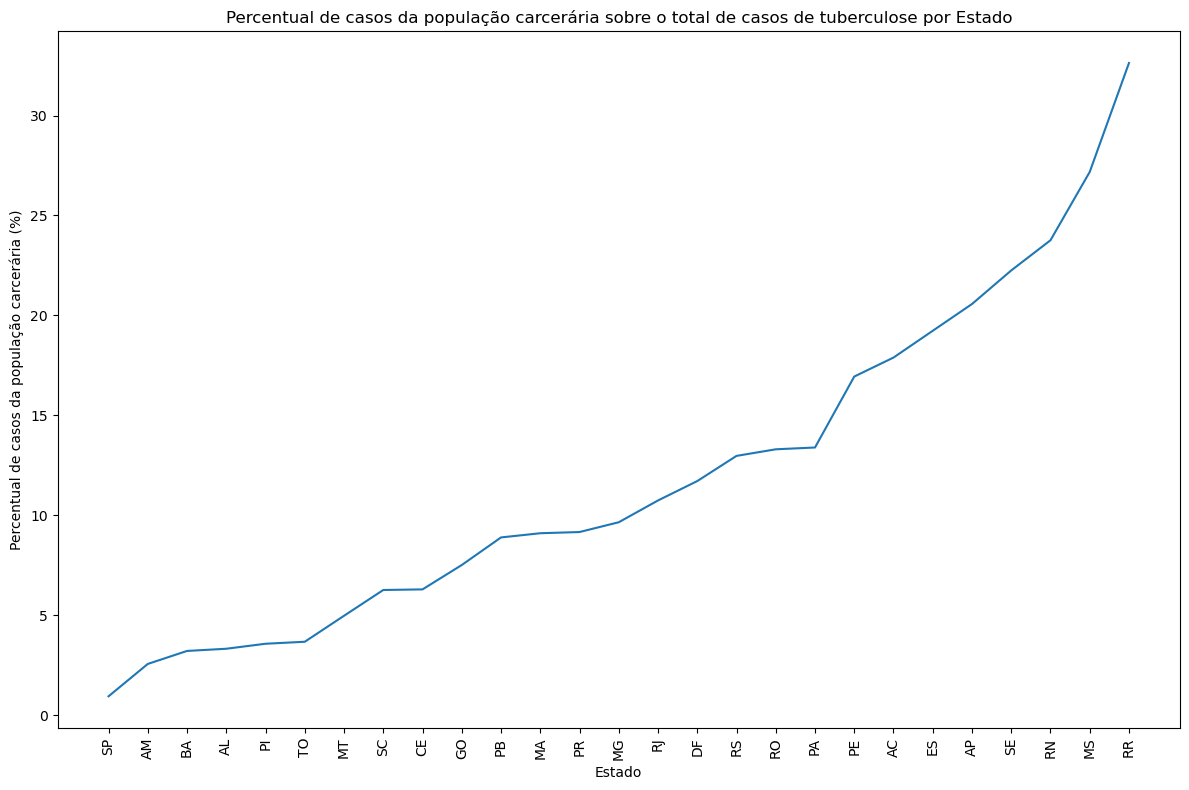

In [219]:
# ANÁLISE POPULAÇÃO PRISIONAL Gráfico de Linha

import seaborn as sns
import matplotlib.pyplot as plt

dados_pop_prisao_sorted = dados_pop_prisao.sort_values(by='%')

plt.figure(figsize=(12, 8))
sns.lineplot(data=dados_pop_prisao_sorted, x='ESTADO', y='%')

plt.xlabel('Estado')
plt.ylabel('Percentual de casos da população carcerária (%)')
plt.title('Percentual de casos da população carcerária sobre o total de casos de tuberculose por Estado')

plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajusta automaticamente o layout para evitar que as legendas se sobreponham

plt.show()


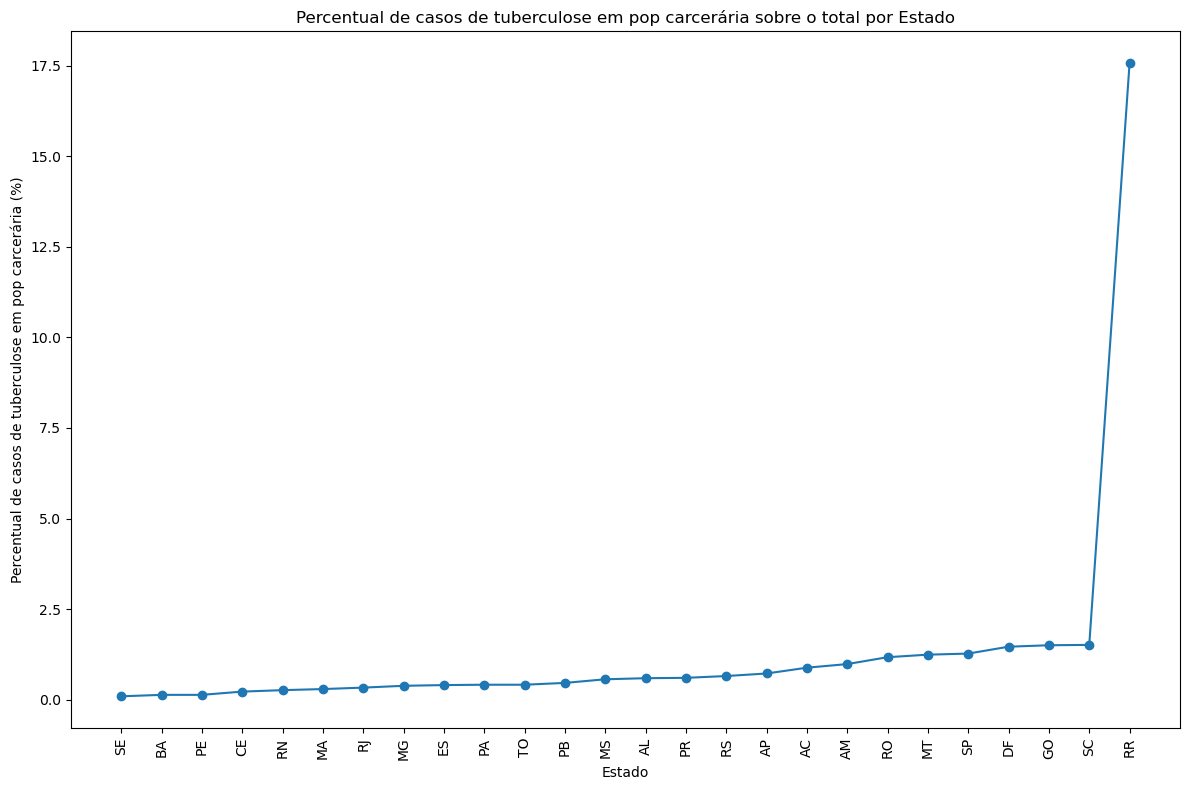

In [270]:
import matplotlib.pyplot as plt

dados_pop_prisao = dados.sort_values(by='%')

plt.figure(figsize=(12, 8))
plt.plot(dados_pop_prisao['ESTADO'], dados_pop_prisao['%'], marker='o')

plt.xlabel('Estado')
plt.ylabel('Percentual de casos de tuberculose em pop carcerária (%)')
plt.title('Percentual de casos de tuberculose em pop carcerária sobre o total por Estado')

plt.xticks(rotation=90) 
plt.tight_layout() 

plt.show()

# ANÁLISE POPULAÇÃO DE RUA

In [271]:
# panorama dados a serem destrinchados 
pop_var = df_tuberculose.groupby(['POP_RUA', 'POP_LIBER', 'POP_IMIG']).size()
pop_var = pd.DataFrame(pop_var)
# pop_var


## População de rua em estados mais frios respondem por um percentual 
## maior dentre a população com tuberculose
média aproximadamente 5%, estados frios >>

In [272]:
pop_rua = df_tuberculose.groupby(['POP_RUA', 'ESTADO']).size().reset_index(name='count')
pop_rua = pd.DataFrame(pop_rua)
pop_rua = pop_rua.loc[pop_rua['POP_RUA'] == 'Situação de Rua']
# pop_rua

casos_geral = df_tuberculose.groupby(['ESTADO']).size().reset_index(name='contagem')
# casos_geral
dados = pd.merge(pop_rua, casos_geral, left_on='ESTADO', right_on='ESTADO', how='left')

dados['%'] = (dados['count'] / dados['contagem'])*100
dados['%'] = dados['%'].map("{:.2f}%".format)
dados

,POP_RUA,ESTADO,count,contagem,%
0,Situação de Rua,AC,12,570,2.11%
1,Situação de Rua,AL,37,1023,3.62%
2,Situação de Rua,AM,128,4070,3.14%
3,Situação de Rua,AP,10,418,2.39%
4,Situação de Rua,BA,138,4636,2.98%
5,Situação de Rua,CE,195,4117,4.74%
6,Situação de Rua,DF,22,410,5.37%
7,Situação de Rua,ES,106,1986,5.34%
8,Situação de Rua,GO,46,1199,3.84%
9,Situação de Rua,MA,101,2769,3.65%


## Mês com maior quantidade de casos por estado

In [273]:
teste = df_tuberculose.groupby(['MES_DIAG', 'ESTADO']).size()

maximo_estado = []

for i, g in teste.reset_index(name='casos').groupby(['ESTADO']):
    maximo_estado.append(g[g.casos == g.casos.max()])
    
concatenando = pd.concat(maximo_estado)
# concatenando mostra mês com maior quantidade de casos por estado

print("Mes que tem maior incidência de casos de tuberculose")
concatenando['MES_DIAG'].mode()

Mes que tem maior incidência de casos de tuberculose


0    8
Name: MES_DIAG, dtype: int64

## Gráfico com máximo de casos por estado


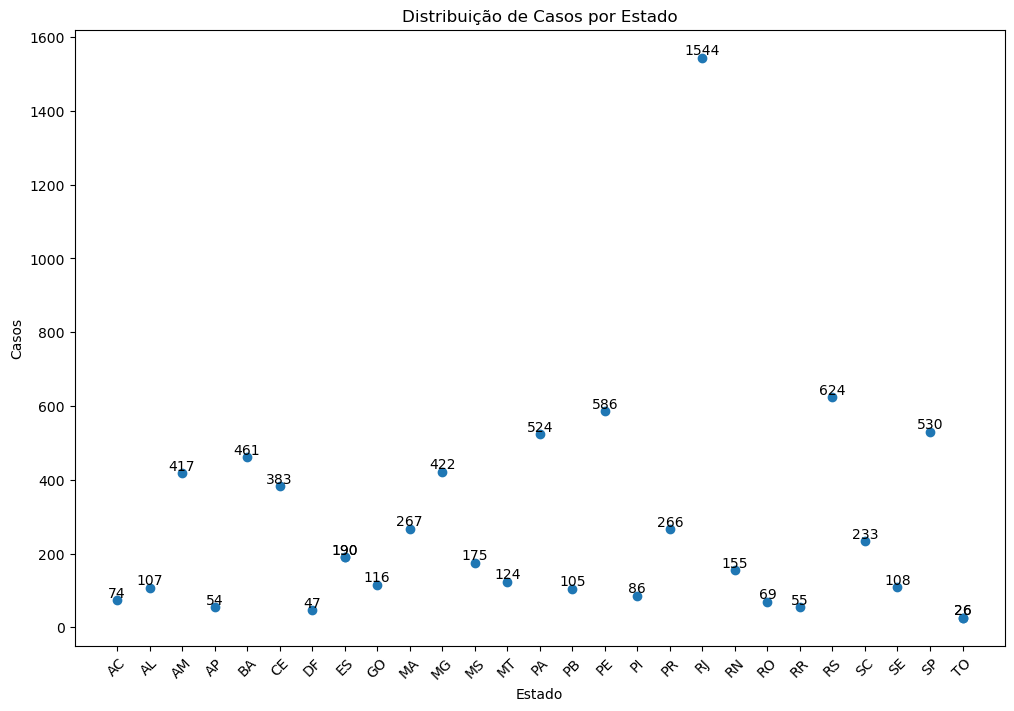

In [274]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Crie o boxplot usando o Seaborn
plt.figure(figsize=(12, 8))
plt.scatter(data=concatenando, x='ESTADO', y='casos')
# sns.boxplot(data=concatenando, x='ESTADO', y='casos')
for index, row in concatenando.iterrows():
    plt.text(row['ESTADO'], row['casos'], str(row['casos']), ha='center', va='bottom')
# sns.boxplot(x='ESTADO', y='casos', data=concatenando)
plt.title('Distribuição de Casos por Estado')
plt.xlabel('Estado')
plt.ylabel('Casos')
plt.xticks(rotation=45)
plt.show()

# ANÁLISE POPULAÇÃO GRÁVIDA


In [185]:
##Análise de casos de tuberculose divido por sexo 
# pop_total = df_tuberculose.groupby(['CS_SEXO', 'ESTADO']).size().reset_index(name='count')

pop_gravida = df_tuberculose[
    (df_tuberculose['CS_GESTANT'] != "Não se Aplica") &
    (df_tuberculose['CS_GESTANT'] != "Outros")
]

num_pop_gravida = pop_gravida['DT_DIAG'].count()
# pop_gravida

groupby_gravidas = pop_gravida.groupby(['CS_GESTANT']).size().reset_index(name='count')
groupby_gravidas['total'] = num_pop_gravida
groupby_gravidas['%'] = groupby_gravidas['count'] / groupby_gravidas['total'] * 100
groupby_gravidas

,CS_GESTANT,count,total,%
0,1º Trimestre,85,23465,0.362242
1,2º Trimestre,111,23465,0.473045
2,3º Trimestre,73,23465,0.311102
3,Idade Gestacional Ignorada,120,23465,0.511400
4,Ign/Branc,1526,23465,6.503303
5,Não,21550,23465,91.838909


# ANÁLISE ESCOLARIDADE

In [275]:
##Análise de casos de tuberculose divido por sexo 
# pop_total = df_tuberculose.groupby(['CS_SEXO', 'ESTADO']).size().reset_index(name='count')

pop_escolaridade = df_tuberculose[df_tuberculose['ESCOLARIDADE'] != 'Outro']
pop_escolaridade = df_tuberculose[df_tuberculose['IDADE'] >= 18]

pop_escolaridade['group_escol'] = pop_escolaridade['ESCOLARIDADE'].apply(lambda x: 'EF Incompleto' if x == '1ª a 4ª série incompleta do EF'
                                                                          else ('EF Incompleto' if x == '4ª série completa do EF'
                                                                          else ('EF Incompleto' if x == '5ª a 8ª série incompleta do EF'
                                                                          else ('EF completo' if x == 'Ensino fundamental completo'
                                                                          else ('EF completo' if x == 'Ensino médio incompleto'
                                                                          else ('EM completo' if x == 'Ensino médio completo'
                                                                          else ('EM completo' if x == 'Educação superior incompleta'
                                                                          else ('ES completo' if x == 'Educação superior completa'
                                                                          else ('Não se aplica' if x == 'Não se aplica'
                                                                          else ('Analfabeto' if x == 'Analfabeto'
                                                                          else ('Ign/Branc' if x == 'Ign/Branc'
                                                                          else 'Outro')))))))))))



num_pop_escolaridade = pop_escolaridade['DT_DIAG'].count()

groupby_escolaridade = pop_escolaridade.groupby(['group_escol']).size().reset_index(name='count')
groupby_escolaridade['total'] = num_pop_escolaridade
groupby_escolaridade['%'] = groupby_escolaridade['count'] / groupby_escolaridade['total'] * 100
groupby_escolaridade



C:\Users\luizjr\AppData\Local\Temp\ipykernel_20024\62940737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_escolaridade['group_escol'] = pop_escolaridade['ESCOLARIDADE'].apply(lambda x: 'EF Incompleto' if x == '1ª a 4ª série incompleta do EF'


,group_escol,count,total,%
0,Analfabeto,2438,74253,3.283369
1,EF Incompleto,24175,74253,32.557607
2,EF completo,12966,74253,17.461921
3,EM completo,12230,74253,16.470715
4,ES completo,2584,74253,3.479994
5,Ign/Branc,19636,74253,26.444723
6,Não se aplica,224,74253,0.301671


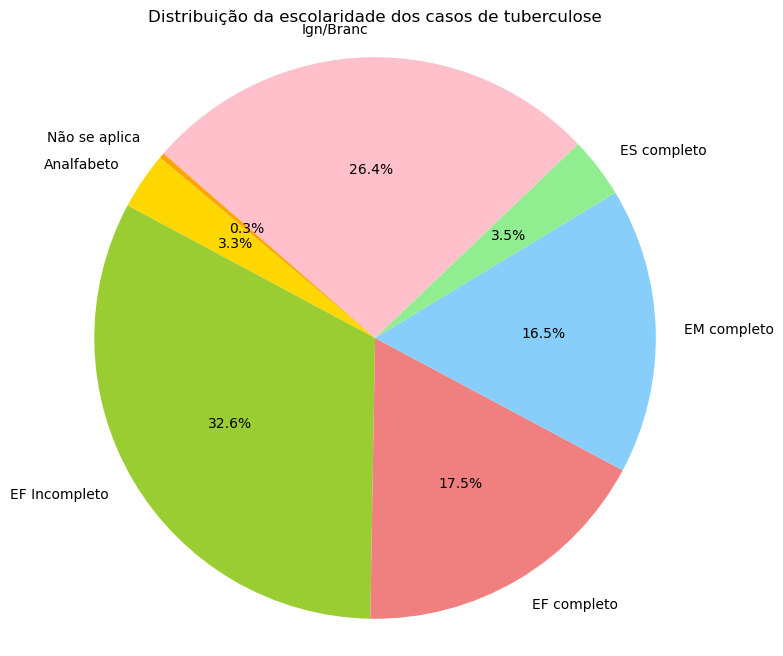

In [276]:
labels = groupby_escolaridade['group_escol']
sizes = groupby_escolaridade['%']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'orange', 'lightblue', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição da escolaridade dos casos de tuberculose')

plt.axis('equal')
plt.show()

In [ ]:
# pivotando = groupby_escolaridade.pivot(columns='month',
#                                                           index='utm_source',
#                                                           values='id').reset_index()

# ANÁLISE IDADES

In [277]:
idades = df_tuberculose.groupby(['IDADE']).size().reset_index(name='count')
idades

,IDADE,count
0,0,366
1,1,183
2,2,184
3,3,162
4,4,149
...,...,...
104,104,1
105,105,1
106,110,3
107,112,1


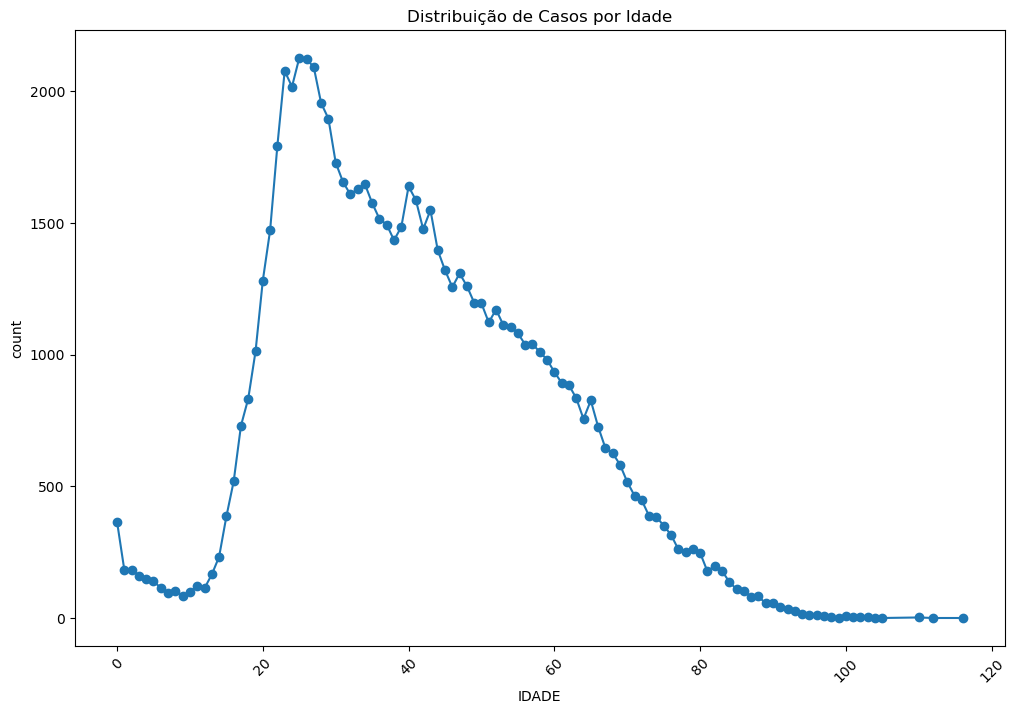

In [189]:
# Crie o boxplot usando o Seaborn
plt.figure(figsize=(12, 8))
# plt.scatter(data=idades, x='IDADE', y='count')
plt.plot(idades['IDADE'], idades['count'], marker='o', linestyle='-')
# sns.boxplot(data=concatenando, x='ESTADO', y='casos')
# for index, row in concatenando.iterrows():
#     plt.text(row['IDADE'], row['count'], str(row['count']), ha='center', va='bottom')
# sns.boxplot(x='ESTADO', y='casos', data=concatenando)
plt.title('Distribuição de Casos por Idade')
plt.xlabel('IDADE')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

# ANÁLISE TRATAMENTO

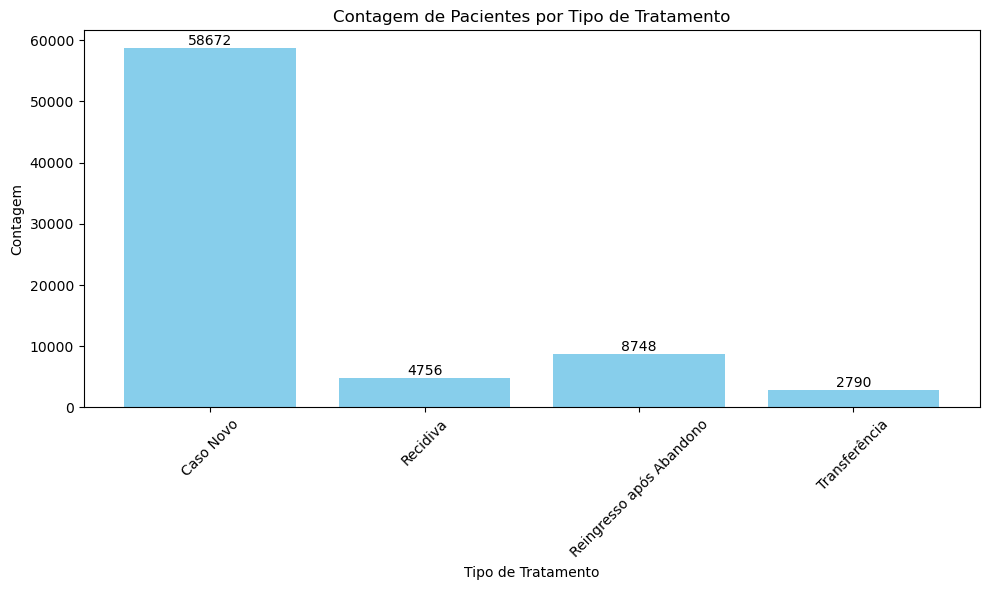

In [278]:
pop_trat = df_tuberculose[df_tuberculose['TRATAMENTO'] != 'Pós-óbito']
pop_trat = pop_trat[pop_trat['TRATAMENTO'] != 'Não Sabe']
pop_trat = pop_trat[pop_trat['POP_RUA'] != 'Outro']


# pop_residencia = pop_trat[pop_trat['POP_RUA'] == 'Com residência']
# pop_sit_rua = pop_trat[pop_trat['POP_RUA'] == 'Situação de Rua']

# pop_residencia
# dados_trat = pd.merge(pop_residencia, pop_sit_rua, on='ESTADO', suffixes=('_fem', '_masc'))

# dados_trat = pd.merge(dados, casos_geral, on='ESTADO')


# total_pop_trat = pop_trat['TRATAMENTO'].count()
# total_pop_trat

########### % população de rua VS % com residencia ###########
# pop_rua = pop_trat.groupby(['POP_RUA']).size().reset_index(name='count')
# pop_rua['total'] = total_pop_trat
# pop_rua['%'] = (pop_rua['count'] / total_pop_trat) * 100
# pop_rua

########### count de traramentos ###########
tratamento_group = pop_trat.groupby(['TRATAMENTO']).size().reset_index(name='count')
tratamento_group


# Configurar os dados do gráfico
tratamentos = tratamento_group['TRATAMENTO']
contagens = tratamento_group['count']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(tratamentos, contagens, color='skyblue')

# Adicionar rótulos de dados (valores) às barras
for bar, count in zip(bars, contagens):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 5, 
             str(count), 
             ha='center', 
             va='bottom')

# Adicionar título e rótulos dos eixos
plt.title('Contagem de Pacientes por Tipo de Tratamento')
plt.xlabel('Tipo de Tratamento')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pop_total = df_tuberculose.groupby(['CS_SEXO', 'ESTADO']).size().reset_index(name='count')
casos_geral = df_tuberculose.groupby(['ESTADO']).size().reset_index(name='total_de_casos')

pop_fem = pop_total[pop_total['CS_SEXO'] == 'F']

chi quadrado

# REFERÊNCIAS

CASOS DE TUBERCULOSE POR ESTRANGEIROS- LINKS

Venezuela em crise vive surto de tuberculose 
Má nutrição e estresse estão enfraquecendo sistema imunológico da população, dizem médico (2018)
https://www1.folha.uol.com.br/mundo/2018/03/venezuela-em-crise-vive-surto-de-tuberculose.shtml

Crise na Venezuela traz de volta antigas e graves doenças
Doenças antes praticamente erradicadas como sarampo, tuberculose, malária voltaram com força total. Número de crianças que morrem antes de completar 1 ano aumentou 30%. (2019)
https://g1.globo.com/jornal-nacional/noticia/2019/04/04/crise-na-venezuela-traz-de-volta-antigas-e-graves-doencas.ghtml

Artigo:
O impacto da imigração sobre a tuberculose e a carga de HIV entre Colômbia e Venezuela e nas regiões de fronteira
https://www.scielo.br/j/csp/a/rRvMrX9TXcRvgLqBNdpmqNS/abstract/?lang=pt

Dados da Unicef:
https://www.unicef.org/brazil/crise-migratoria-venezuelana-no-brasil

Fluxo de migrantes venezuelanos no Brasil cresceu mais de 900% em dois anos
https://www.unodc.org/lpo-brazil/pt/frontpage/2021/07/fluxo-de-migrantes-venezuelanos-no-brasil-cresceu-mais-de-900-em-dois-anos.html

ANÁLISE POPULAÇÃO CARCERÁRIA- LINKS
Mais de 200 casos de tuberculose foram registrados nos presídios de RR
Em 2023, dois detentos morreram vítimas da doença(2023)
https://www.folhabv.com.br/policia/mais-de-200-casos-de-tuberculose-foram-registrados-nos-presidios-de-rr/#:~:text=Mais%20de%20200%20casos%20de%20tuberculose%20foram%20registrados%20nos%20pres%C3%ADdios%20de%20RR,-Em%202023%2C%20dois&text=Os%20detentos%20Ana%20Caroline%20Gomes,casos%20foram%20noticiados%20pela%20FolhaBV.

SOBRE AGOSTO: MÊS DE MÁXIMA INCIDÊNCIA DE TUBERCULOSE NOS ESTADOS

AGOSTO: MÊS QUE MARCA A LUTA CONTRA A TUBERCULOSE NO ESTADO DO RIO DE JANEIRO
https://redetb.org.br/agosto-mes-que-marca-a-luta-contra-a-tuberculose-no-estado-do-rio-de-janeiro/



Sobre Tuberculose no Brasil:

Brasil registra 78 mil novos casos de tuberculose
Levantamento aponta aumento de 5% em 2022
https://agenciabrasil.ebc.com.br/saude/noticia/2023-03/brasil-registra-78-mil-novos-casos-de-tuberculose-em-2022
____

# CONCLUSÕES

Conclusões:

No gráfico dos casos de tuberculose divididos por sexo, podemos destacar que a doença atinge quase o dobro de homens que mulheres em quase todos os estados do país, com exceção de São Paulo que apresenta grande disparidade com uma alta taxa da doença no sexo feminino. 
No gráfico sobre a incidência da doença sobre faixa etária, podemos notar que há uma escalada de casos da doença entre os 18 aos 25 anos, se mantendo alta mas numa decrescente até os 60 anos, tendo alguns picos entre 40-50 anos. 
Dados divulgados pelo Ministério da Saúde (vide links para referência)  apontam que homens de 20 a 64 anos apresentam risco três vezes maior de contrair a doença do que as mulheres de mesma faixa etária, o que será analisado em um segundo momento. 
Contudo, é importante destacar que na nossa análise, na maioria dos estados do país, a doença atinge na maior parte homens e com predominância na faixa etária dos 20 a 60 anos, a princípio para ambos os sexos.

Sobre os dados de Imigrantes - considerados  aqueles que estão há menos de 2 anos no país -  os estados de fronteira e os principais destinos de imigrantes no país apresentam as maiores taxas de tuberculose, com dados altíssimos em Roraima, com 17.58% dos casos. Isso se explica pela grande concentração de imigrantes que pedem refúgio no Brasil. 
Para termos de comparação, dados da Unicef indicam que entre 2017 e 2020, o país recebeu mais de 609 mil migrantes venezuelanos. Em comparação com o biênio anterior, isso representa um acréscimo de 922%, sendo o Brasil o país com maior abrigo dessa nacionalidade no mundo. A maioria entra pela fronteira norte do país, no Estado de Roraima, o que destaca o alto índice. É importante ressaltar que, a partir de 2018, diversas notícias de jornal apontavam para uma crise do sistema de saúde na Venezuela com a tuberculose, dentre outras doenças que já haviam sido erradicadas, de modo que a ONU apontou caso de emergência humanitária. 
Podemos destacar os altos índices do Amapá, Rio Grande do Norte, Mato Grosso do Sul (que recebe bastantes venezuelanos, tendo uma rede de apoio local), dentre outros. 

Roraima também possui um  máximo de casos da doença na análise de População carcerária e isso reflete surtos da doença em presídios em RR em 2022, com mortes até 2023. A doença tem fácil disseminação e encontra na má nutrição dos presos e na densidade populacional, um ambiente propício. O gráfico acaba por imprimir uma realidade das cadeias do país, concentrando casos em uma escala que envolve Pernambuco (que tem uma das maiores cadeias), Rio Grande do Norte, Roraima, dentre outras.

Analisamos também os dados da população de rua e esses respondem, em média, por cerca de 5% dos casos de tuberculose, por estado. Contudo, estamos cientes da subnotificação dessa população, então como próximo passo gostaríamos de correlacionar esses dados com o gráfico de Tratamentos, para verificar se dentro dessa população há um alto percentual de abandono do tratamento, tendo em vista a situação de vulnerabilidade social extrema em que se encontram. 

Destacamos também o mês de máxima de casos de tuberculose em cada estado e encontramos o mês de agosto como o mais recorrente. Esse mês no nosso clima corresponde ao final do inverno, o que pode indicar também uma dificuldade de identificação da doença que pode ser confundida com uma gripe forte devido às mudanças climáticas. No entanto, a demora na busca do tratamento leva a uma maior disseminação da doença, tendo em vista o contato da pessoa infectada com pessoas da família na mesma casa, ambiente de trabalho, dentre outros. 

O Rio de Janeiro vive uma crise na saúde, sendo que o estado tem observado um crescente número de mortes pela doença. Em 2019 foram 659 óbitos; em 2020, 795, e  em 2021, 805, de acordo com a Secretaria de Saúde do Rio de Janeiro. A pobreza tende a ampliar a disseminação da doença, com as péssimas condições sanitárias, muitas pessoas dividindo o mesmo espaço e a desnutrição, como já foi mencionado anteriormente. 
Por curiosidade, no Rio, em  6 de agosto, comemora-se o Dia Estadual de Conscientização, Mobilização e Combate à Tuberculose.
O gráfico espelha a grande desigualdade social que vivemos no Brasil, e que o Rio de Janeiro tem se tornado símbolo, acompanhado de Rio Grande do Sul, Pernambuco,São Paulo, Pará, dentre outros. 

Por fim, ao montar o gráfico de escolaridade, percebemos a importância de trazer os dados por estado para a análise, pois  o total de casos por escolaridade obscurece as diferenças regionais que temos no país. Outro dado importante para a análise é o número total da população por estado para termos a compreensão do percentual que os casos de tuberculose representam sobre a população total. Desse modo, o gráfico de pizza, realizado em uma primeira etapa, não leva a conclusões válidas.

Realizamos também a análise da população de grávidas e os dados parecem indicar uma falta de acompanhamento do pré-natal que é realizado pelo SUS e até mesmo desconhecimento dos sintomas da tuberculose, tendo muitos casos da doença em estágios avançados da gravidez.

Por último, temos o gráfico de tratamento que possui um número alto de “Reingresso após abandono”, mas o que chama mais atenção é o número de pessoas que responderam “Não sabe” quanto à questão se já tiveram a doença ou não, o que leva mais uma vez à falta de informação da doença. Contudo, como informado anteriormente, esse gráfico será melhor analisado, tendo seus dados cruzados com outras variáveis. 

Em 2022, o Brasil teve mais de 78 mil novos casos da doença segundo o Ministério de Saúde e, em 2021, teve recorde de mortes, mais de 5 mil, o maior número em 10 anos, tendo perdido apenas para a COVID. Ela é ainda a principal causa de morte de pessoas com AIDS.
 É importante destacar também que 48% das famílias afetadas de alguma forma pela tuberculose  têm gastos com a doença que comprometem acima de 20% da renda, o que pode levar famílias inteiras à condição de pobreza e miséria. 
Desse modo, destaca-se a importância dos dados divulgados pelo Sinan, Sistema de Informação de Agravos de Notificação, do SUS, para que possamos fazer análises e criar dados para pautar políticas públicas que façam a diferença para o país.
 
Viva o SUS!